In [145]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import re
from wordcloud import WordCloud, STOPWORDS
from stopwords import get_stopwords

castles = pd.read_csv('data/castelli.csv', delimiter='|', encoding='ISO-8859-1')
bibliography = pd.read_csv('data/bibliografia.csv', delimiter='|', encoding='ISO-8859-1')
events = pd.read_csv('data/vicende.csv', delimiter='|', encoding='ISO-8859-1')

## castelli.csv

In [146]:
castles = castles.drop('DataOraModifica', axis=1)

In [147]:
print(castles.head())

   IdCastello               IdVeteroDb IdRifVeteroDb     Castello  \
0         258            Faenza-Oriolo           FA1       Oriolo   
1         259   Brisighella-Baccagnano           FA1   Baccagnano   
2         260      Brisighella-Boesimo           FA1      Boesimo   
3         261  Brisighella-Brisighella           FA1  Brisighella   
4         262    Brisighella-Calamello           FA1    Calamello   

   NumeroSullaCarta  EsistenzaDubbia     Toponimo  IdProvincia       Comune  \
0              51.0                0       Oriolo            9       Faenza   
1               1.0                0   Baccagnano            9  Brisighella   
2               2.0                0      Boesimo            9  Brisighella   
3               3.0                0  Brisighella            9  Brisighella   
4               4.0                0    Calamello            9  Brisighella   

         Localita  ...  DescrizioneSito EdificioIsolato ComplessoEdilizio  \
0          Oriolo  ...           

In [148]:
print(castles.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   IdCastello               2000 non-null   int64  
 1   IdVeteroDb               2000 non-null   object 
 2   IdRifVeteroDb            2000 non-null   object 
 3   Castello                 2000 non-null   object 
 4   NumeroSullaCarta         1895 non-null   float64
 5   EsistenzaDubbia          2000 non-null   int64  
 6   Toponimo                 809 non-null    object 
 7   IdProvincia              2000 non-null   int64  
 8   Comune                   2000 non-null   object 
 9   Localita                 1841 non-null   object 
 10  Localizzazione           1711 non-null   float64
 11  RifCTR                   316 non-null    object 
 12  RifIGM                   190 non-null    object 
 13  CondizioniAttuali        1215 non-null   float64
 14  UsoAttuale              

In [149]:
print(castles.isnull().sum())

IdCastello                    0
IdVeteroDb                    0
IdRifVeteroDb                 0
Castello                      0
NumeroSullaCarta            105
EsistenzaDubbia               0
Toponimo                   1191
IdProvincia                   0
Comune                        0
Localita                    159
Localizzazione              289
RifCTR                     1684
RifIGM                     1810
CondizioniAttuali           785
UsoAttuale                 1657
RifFotoAerea               2000
Planimetria                1952
InterventiRicognitivi      1973
DescrizioneSito            1883
EdificioIsolato               0
ComplessoEdilizio             0
InsediamentoFortificato       0
AttPrecastrensi            1949
CartografiaStorica         1973
IconografiaStorica         1959
RestauriInStile            1970
CostruzioniNeomedievali    1990
Note                       1617
dtype: int64


In [150]:
print(castles.duplicated().sum())

0


<Axes: >

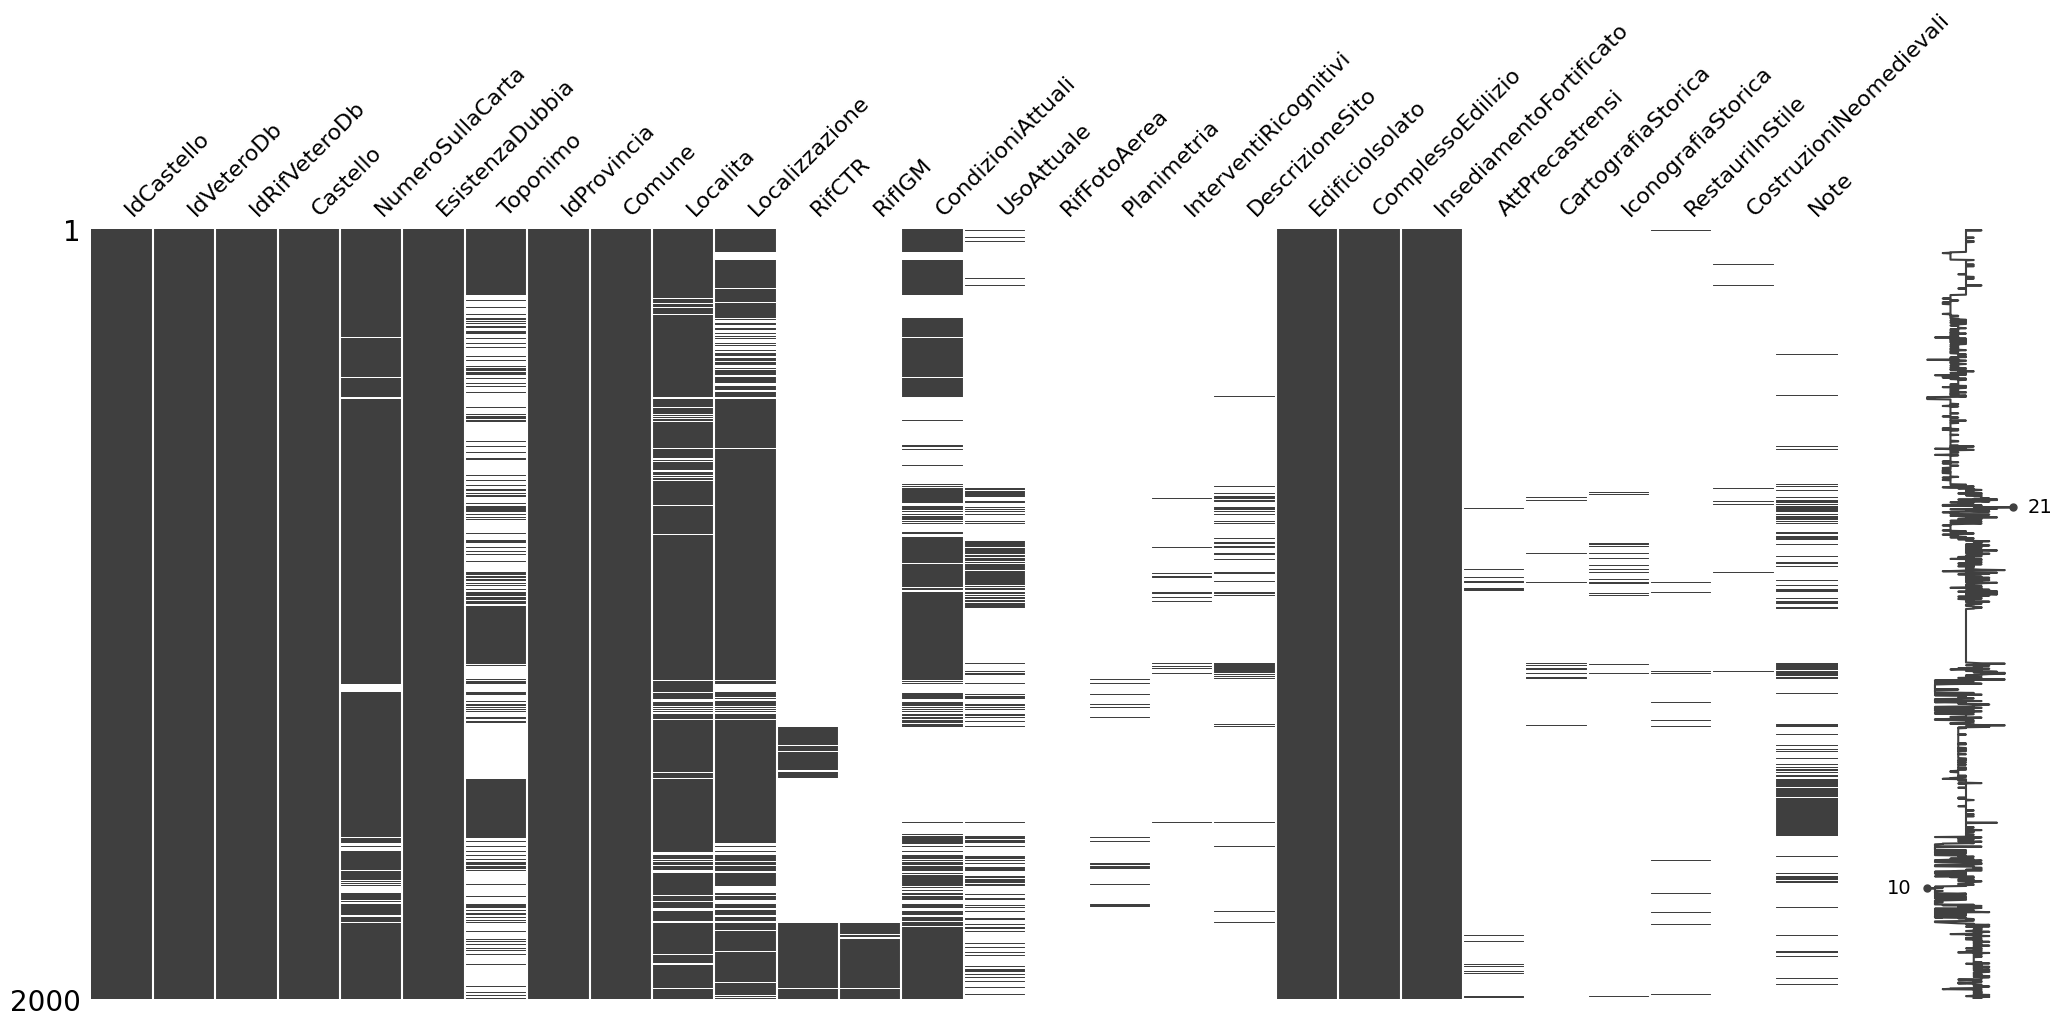

In [151]:
msno.matrix(castles)

Comune
Ravenna                 59
Brisighella             39
Cesena                  39
Pavullo nel Frignano    34
Sarsina                 29
Bagno di Romagna        28
Civitella               27
Rimini                  27
Reggio Emilia           26
Mercato Saraceno        25
Santa Sofia             24
Imola                   24
Verghereto              22
Bettola                 21
Faenza                  20
Predappio               19
Forlì                   18
Casola Valsenio         18
Piozzano                16
Meldola                 16
Carpaneto               16
Travo                   16
Parma                   15
Roncofreddo             15
Agazzano                15
Name: count, dtype: int64


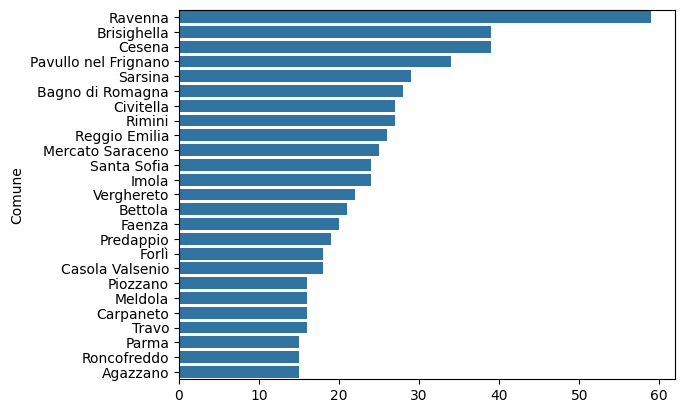

In [152]:
comune_counts = castles['Comune'].value_counts().head(25)
print(comune_counts)
sns.barplot(y=comune_counts.index, x=comune_counts.values)
plt.show()

Toponimo
?                  63
Castellaccio       19
Castello            8
Castellaro          6
Il Castellaccio     6
Montevecchio        5
Ferrara             5
Rocca               5
Castelletto         4
Castellina          4
Name: count, dtype: int64


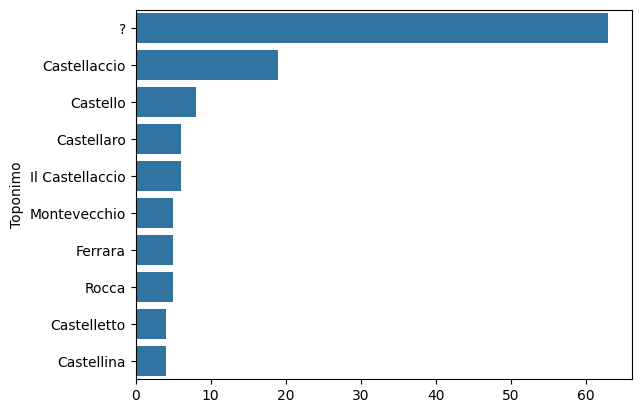

In [153]:
toponimo_counts = castles['Toponimo'].value_counts().head(10)
print(toponimo_counts)
sns.barplot(y=toponimo_counts.index, x=toponimo_counts.values)
plt.show()

Localita
?                  36
Ravenna            23
Castellaccio       17
Castellaro         10
Piacenza            7
Bagno               6
Castelnuovo         6
Casola Valsenio     6
Castel del Rio      6
Castello            6
Gualtieri           5
Reggio Emilia       5
Rocca               5
Cella               5
Montalto            5
Ferrara             5
Castiglione         5
Castelvecchio       5
Monte Castello      5
Piozzano            4
Riolo Terme         4
Castellare          4
Gesso               4
Collina             4
Poggio Berni        4
Name: count, dtype: int64


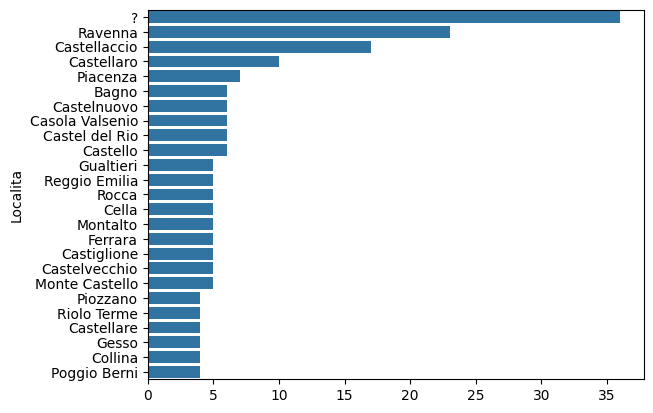

In [154]:
localita_counts = castles['Localita'].value_counts().head(25)
print(localita_counts)
sns.barplot(y=localita_counts.index, x=localita_counts.values)
plt.show()

## bibliografia.csv

In [155]:
bibliography = bibliography.drop('DataOraModifica', axis=1)

In [156]:
print(bibliography.head())

   IdBibliografia       Autore  \
0               1     Ricci L.   
1               2     Zampa R.   
2               3  Zambotti B.   
3               4   Zaghini F.   
4               5  Zaccaria G.   

                                              Titolo DescrizioneOpera  \
0  Alcuni cenni storici di Cusercoli: omaggio al ...              NaN   
1  Il castello e la chiesa di Polenta nella provi...              NaN   
2  Diario Ferrarese dell'anno 1476 sino al 1504: ...              NaN   
3       Fiumana, l'abbazia, il paese e la parrocchia              NaN   
4  Meldola un castello una città: notizie storich...              NaN   

        Sede       Annata LuogoPubblicazione       Anno CuratoreEdizione  \
0        NaN          NaN       Castelplanio       1904              NaN   
1        NaN          NaN             Milano       1891              NaN   
2  RR.II.SS.  XXIV/VII/II            Bologna  1934-1937         Pardi G.   
3        NaN          NaN              Forlì       1

In [157]:
print(bibliography.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154 entries, 0 to 1153
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   IdBibliografia      1154 non-null   int64 
 1   Autore              999 non-null    object
 2   Titolo              1154 non-null   object
 3   DescrizioneOpera    5 non-null      object
 4   Sede                503 non-null    object
 5   Annata              465 non-null    object
 6   LuogoPubblicazione  926 non-null    object
 7   Anno                1141 non-null   object
 8   CuratoreEdizione    342 non-null    object
 9   CasaEditrice        853 non-null    object
 10  ISBN                53 non-null     object
 11  Pagine              471 non-null    object
 12  EdizioniSuccessive  24 non-null     object
 13  VolPiuVol           153 non-null    object
dtypes: int64(1), object(13)
memory usage: 126.3+ KB
None


In [158]:
print(bibliography.isnull().sum())

IdBibliografia           0
Autore                 155
Titolo                   0
DescrizioneOpera      1149
Sede                   651
Annata                 689
LuogoPubblicazione     228
Anno                    13
CuratoreEdizione       812
CasaEditrice           301
ISBN                  1101
Pagine                 683
EdizioniSuccessive    1130
VolPiuVol             1001
dtype: int64


In [159]:
print(castles.duplicated().sum())

0


<Axes: >

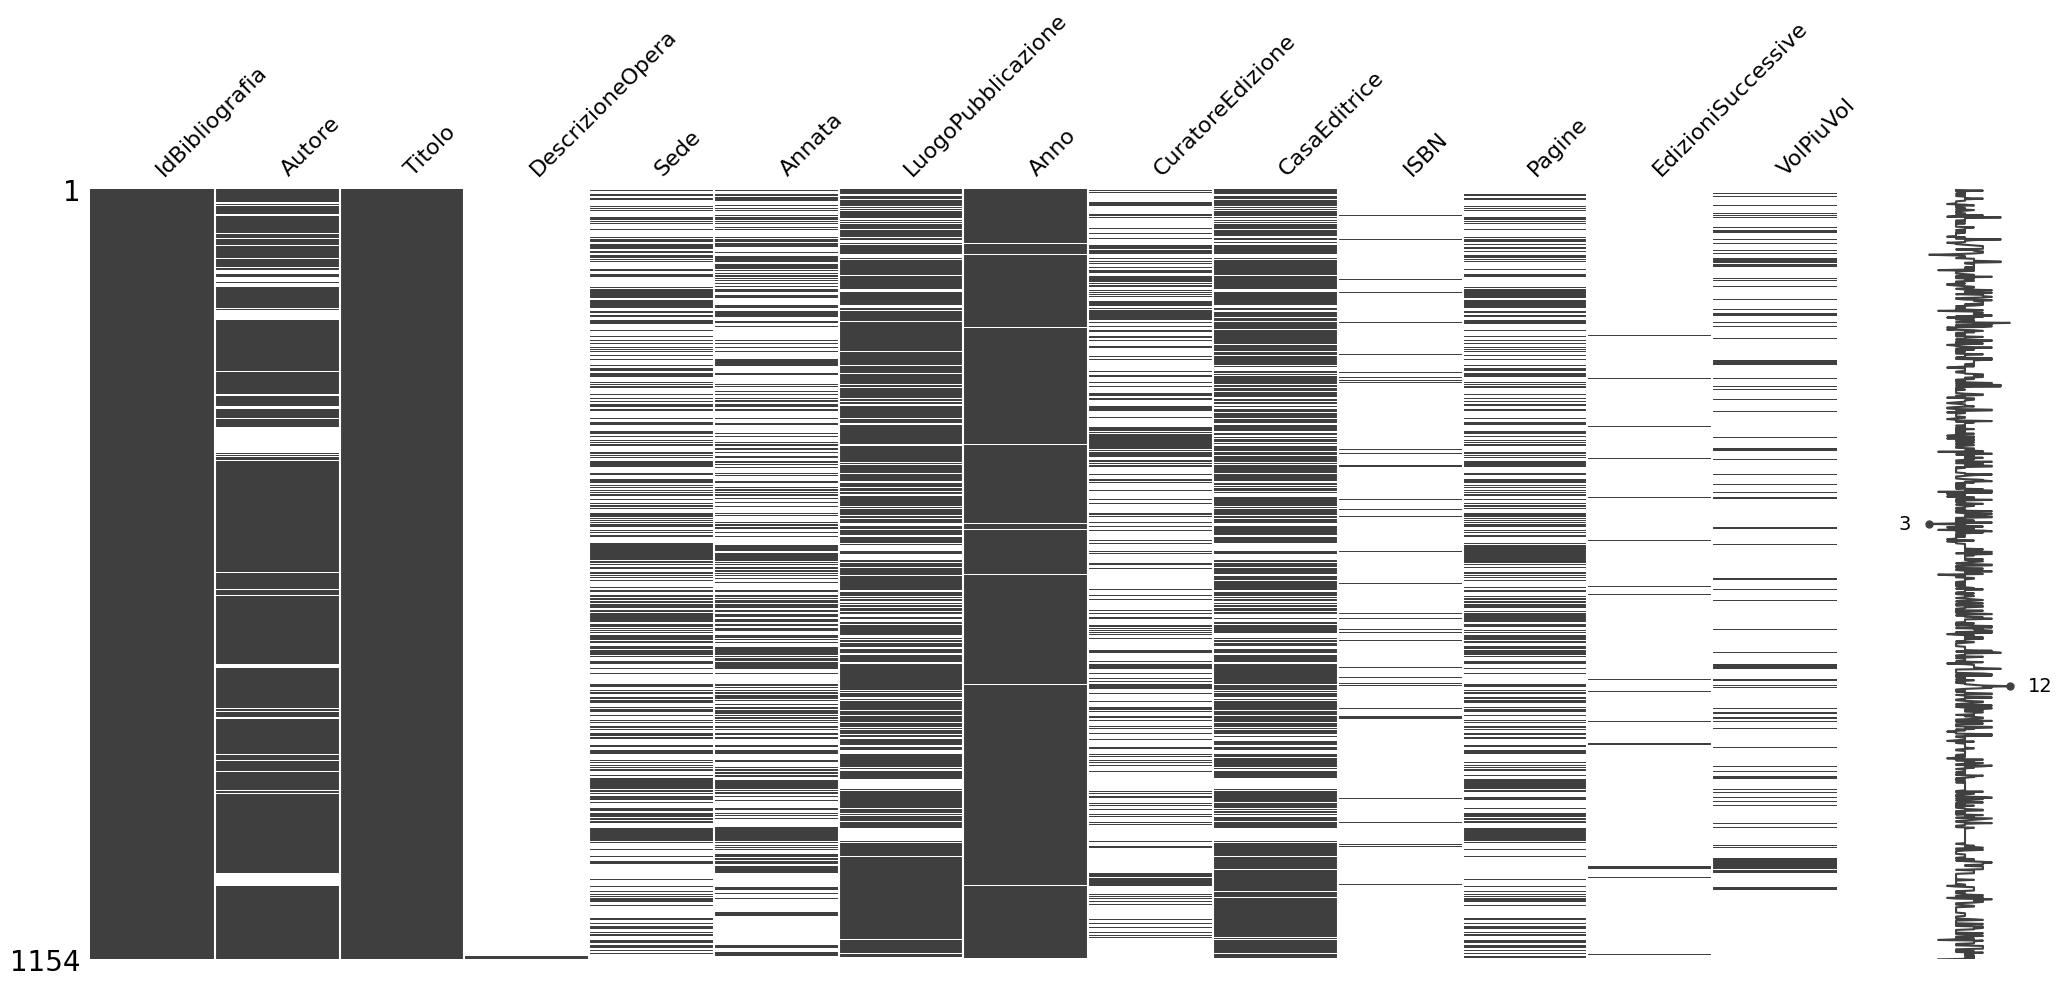

In [160]:
msno.matrix(bibliography)

Autore
Merlini F.        28
Foschi U.         20
Foschi P.         20
Benati A.         18
Tiraboschi G.     15
Tonini L.         13
Ricci C.          10
Poggiali C.        9
Andreolli B.       9
Balduzzi L.        9
Pasolini P. D.     9
Baldisserri L.     8
Affò I.            8
Pezzana A.         8
Artocchini C.      8
Calzolari M.       7
Marinelli L.       7
Fantuzzi M.        7
Gatta F. S.        6
Pini A. I.         6
Boselli G. V.      5
Bocchi F.          5
Torre A.           5
Micheli G.         5
Lazzari T.         5
Name: count, dtype: int64


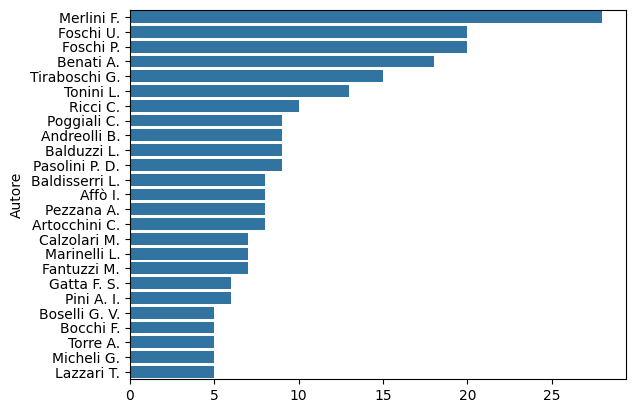

In [161]:
autore_counts = bibliography['Autore'].value_counts().head(25)
print(autore_counts)
sns.barplot(y=autore_counts.index, x=autore_counts.values)
plt.show()

LuogoPubblicazione
Bologna                       120
Parma                          70
Modena                         70
Reggio Emilia                  66
Piacenza                       47
Ravenna                        46
Imola                          45
Roma                           40
Rimini                         34
Firenze                        34
Milano                         32
Faenza                         29
Ferrara                        18
Forlì                          16
Cesena                         13
Venezia                        12
Città di Castello, Bologna     10
Città di Castello               9
s.l.                            9
Finale Emilia                   7
Casalecchio di Reno             7
Porretta Terme, Pistoia         7
Guastalla                       7
Verucchio                       7
Mirandola                       6
Name: count, dtype: int64


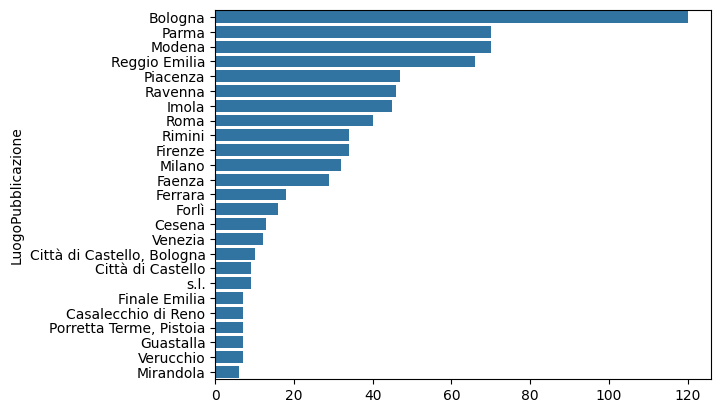

In [162]:
luogo_counts = bibliography['LuogoPubblicazione'].value_counts().head(25)
print(luogo_counts)
sns.barplot(y=luogo_counts.index, x=luogo_counts.values)
plt.show()

Anno
1987    40
2000    31
1997    31
1998    29
1988    27
1995    27
1985    26
1999    23
1971    22
1993    22
2001    21
1990    21
1984    19
1983    19
2002    19
2003    18
1994    18
1989    15
1972    15
1992    14
1978    11
1996    11
1960    11
1981    10
1973    10
Name: count, dtype: int64


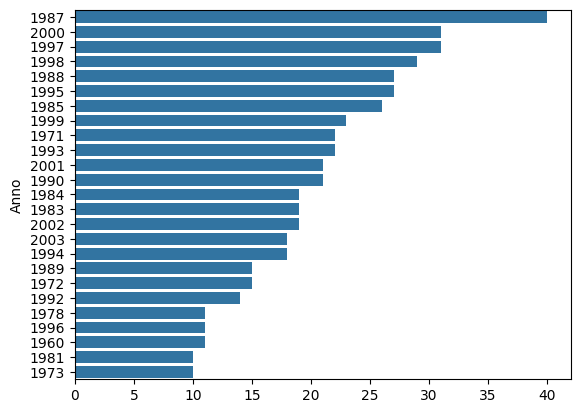

In [163]:
anno_counts = bibliography['Anno'].value_counts().head(25)
print(anno_counts)
sns.barplot(y=anno_counts.index, x=anno_counts.values)
plt.show()

## vicende.csv

In [164]:
events = events.drop('DataOraModifica', axis=1)

In [165]:
print(events.head())

   IdVicenda       IdVeteroDb IdRifVeteroDb  IdBibliografia  \
0       5319  Faenza Oriolo 1           FA1             8.0   
1       5320  Faenza Oriolo 1           FA1             8.0   
2       5321  Faenza Oriolo 1           FA1             8.0   
3       5322  Faenza Oriolo 1           FA1             8.0   
4       5323  Faenza Oriolo 1           FA1             8.0   

   IdBibliografiaProvv  IdCastello     Datazione  DataNA  DataNM  DataNG  ...  \
0               2082.0         258  1510 mar. 10    1510     3.0    10.0  ...   
1               2082.0         258  1556 dic. 26    1556    12.0    26.0  ...   
2               2082.0         258  1690 giu. 30    1690     6.0    30.0  ...   
3               2082.0         258          1771    1771     1.0     1.0  ...   
4               2082.0         258          1824    1824     1.0     1.0  ...   

  VolumeRiferimento PaginaRiferimento NumeroDocumento Denominazione  \
0               NaN                69             NaN          

In [166]:
print(events.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   IdVicenda            38472 non-null  int64  
 1   IdVeteroDb           38353 non-null  object 
 2   IdRifVeteroDb        38353 non-null  object 
 3   IdBibliografia       38462 non-null  float64
 4   IdBibliografiaProvv  38353 non-null  float64
 5   IdCastello           38472 non-null  int64  
 6   Datazione            38244 non-null  object 
 7   DataNA               38472 non-null  int64  
 8   DataNM               38159 non-null  float64
 9   DataNG               38159 non-null  float64
 10  Avvenimento          38343 non-null  object 
 11  Altro                8633 non-null   object 
 12  VolumeRiferimento    13890 non-null  object 
 13  PaginaRiferimento    37766 non-null  object 
 14  NumeroDocumento      3571 non-null   object 
 15  Denominazione        20105 non-null 

In [167]:
print(events.isnull().sum())

IdVicenda                  0
IdVeteroDb               119
IdRifVeteroDb            119
IdBibliografia            10
IdBibliografiaProvv      119
IdCastello                 0
Datazione                228
DataNA                     0
DataNM                   313
DataNG                   313
Avvenimento              129
Altro                  29839
VolumeRiferimento      24582
PaginaRiferimento        706
NumeroDocumento        34901
Denominazione          18367
Appartenenza           18485
TitoloPossesso         31385
StruttureIndicate      28168
Pieve                  37457
Parrocchia             38116
DistrettoCivile        37463
dtype: int64


In [168]:
print(events.duplicated().sum())

0


<Axes: >

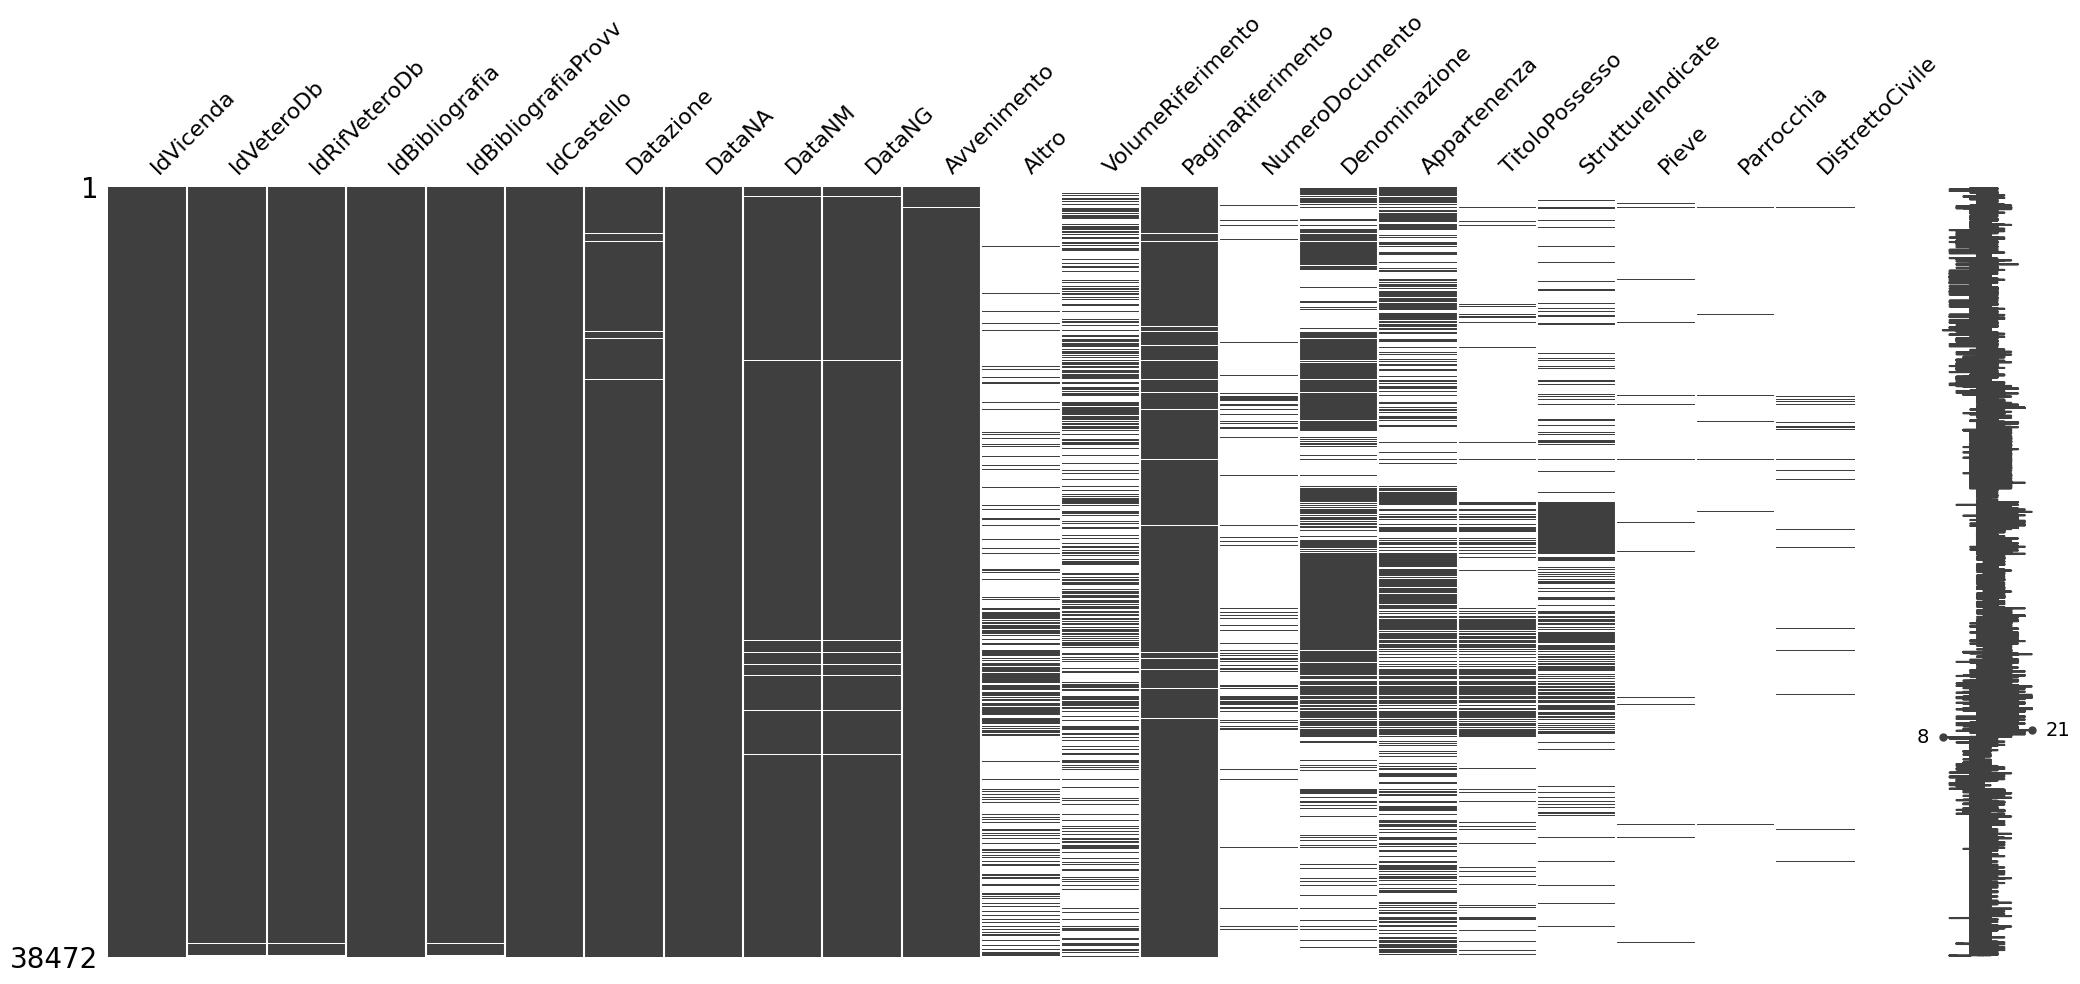

In [169]:
msno.matrix(events)

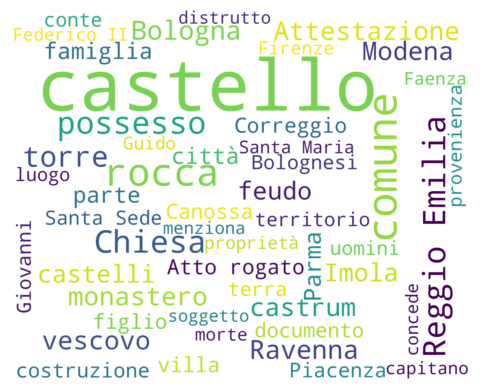

In [170]:
italian_stopwords = set(get_stopwords('it'))
custom_stopwords = set([
    'ed', 
    'et', 
    'si',
    'è',
    'gli',
    'ad',
    'fu',
    'non',
    'come',
    'voi',
    'presso',
    'vi',
    'de\'',
    'poi',
    'nel',
    'e\'',
    'E\'',
    'più',
    'durante',
    'sua',
    'contro',
    'era',
    'suo',
    'quali',
    'quelli',
    'per',
    'dopo',
    'viene',
    'già',
    'quale',
    'dalle',
    'de'
])
all_stopwords = STOPWORDS.union(italian_stopwords).union(custom_stopwords)
text = ' '.join(events['Avvenimento'].dropna())
wordcloud = WordCloud(
    stopwords=all_stopwords,
    width=2500,
    height=2000,
    max_words=50,
    min_font_size=10,
    background_color='white'
).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## merge.csv

In [171]:
merged_bibliography_events = events.merge(bibliography, on='IdBibliografia', how='inner')
merged = castles.merge(merged_bibliography_events, on='IdCastello', how='inner')
print(merged.head())

   IdCastello   IdVeteroDb_x IdRifVeteroDb_x Castello  NumeroSullaCarta  \
0         258  Faenza-Oriolo             FA1   Oriolo              51.0   
1         258  Faenza-Oriolo             FA1   Oriolo              51.0   
2         258  Faenza-Oriolo             FA1   Oriolo              51.0   
3         258  Faenza-Oriolo             FA1   Oriolo              51.0   
4         258  Faenza-Oriolo             FA1   Oriolo              51.0   

   EsistenzaDubbia Toponimo  IdProvincia  Comune Localita  ...  Sede Annata  \
0                0   Oriolo            9  Faenza   Oriolo  ...   NaN    NaN   
1                0   Oriolo            9  Faenza   Oriolo  ...   NaN    NaN   
2                0   Oriolo            9  Faenza   Oriolo  ...   NaN    NaN   
3                0   Oriolo            9  Faenza   Oriolo  ...   NaN    NaN   
4                0   Oriolo            9  Faenza   Oriolo  ...   NaN    NaN   

  LuogoPubblicazione  Anno CuratoreEdizione  CasaEditrice ISBN Pagine  \
0

In [172]:
print(merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38462 entries, 0 to 38461
Data columns (total 62 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   IdCastello               38462 non-null  int64  
 1   IdVeteroDb_x             38462 non-null  object 
 2   IdRifVeteroDb_x          38462 non-null  object 
 3   Castello                 38462 non-null  object 
 4   NumeroSullaCarta         37686 non-null  float64
 5   EsistenzaDubbia          38462 non-null  int64  
 6   Toponimo                 14852 non-null  object 
 7   IdProvincia              38462 non-null  int64  
 8   Comune                   38462 non-null  object 
 9   Localita                 36933 non-null  object 
 10  Localizzazione           35295 non-null  float64
 11  RifCTR                   9930 non-null   object 
 12  RifIGM                   7189 non-null   object 
 13  CondizioniAttuali        22884 non-null  float64
 14  UsoAttuale            

In [173]:
merged = merged.drop([
    'IdVeteroDb_x',
    'IdRifVeteroDb_x',
    'IdVeteroDb_y',
    'IdRifVeteroDb_y',
    'IdBibliografiaProvv',
    'RifFotoAerea',
    'DescrizioneOpera',
    'Pieve',
    'Parrocchia',
    'CostruzioniNeomedievali',
    'EdizioniSuccessive',
    'DistrettoCivile',
    'Planimetria'
], axis=1)

<Axes: >

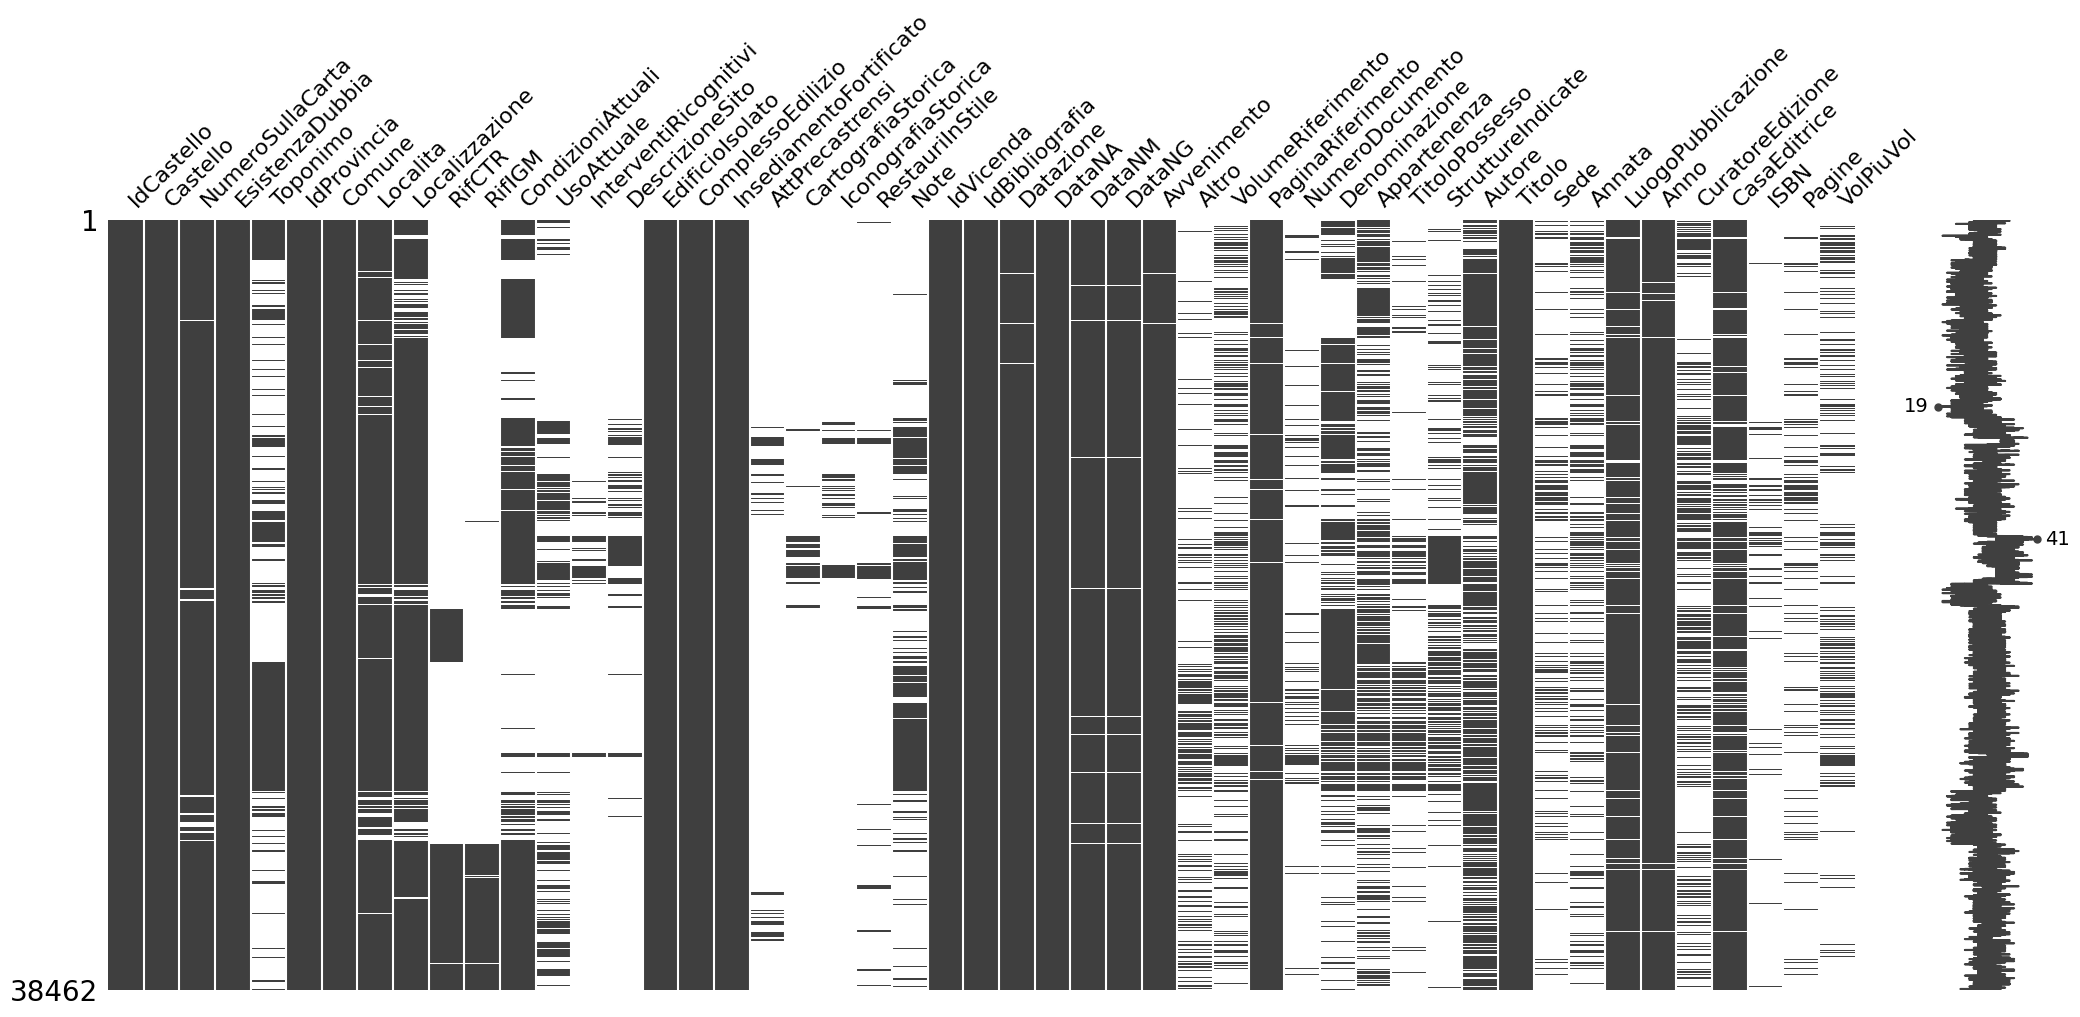

In [174]:
msno.matrix(merged)

<Axes: >

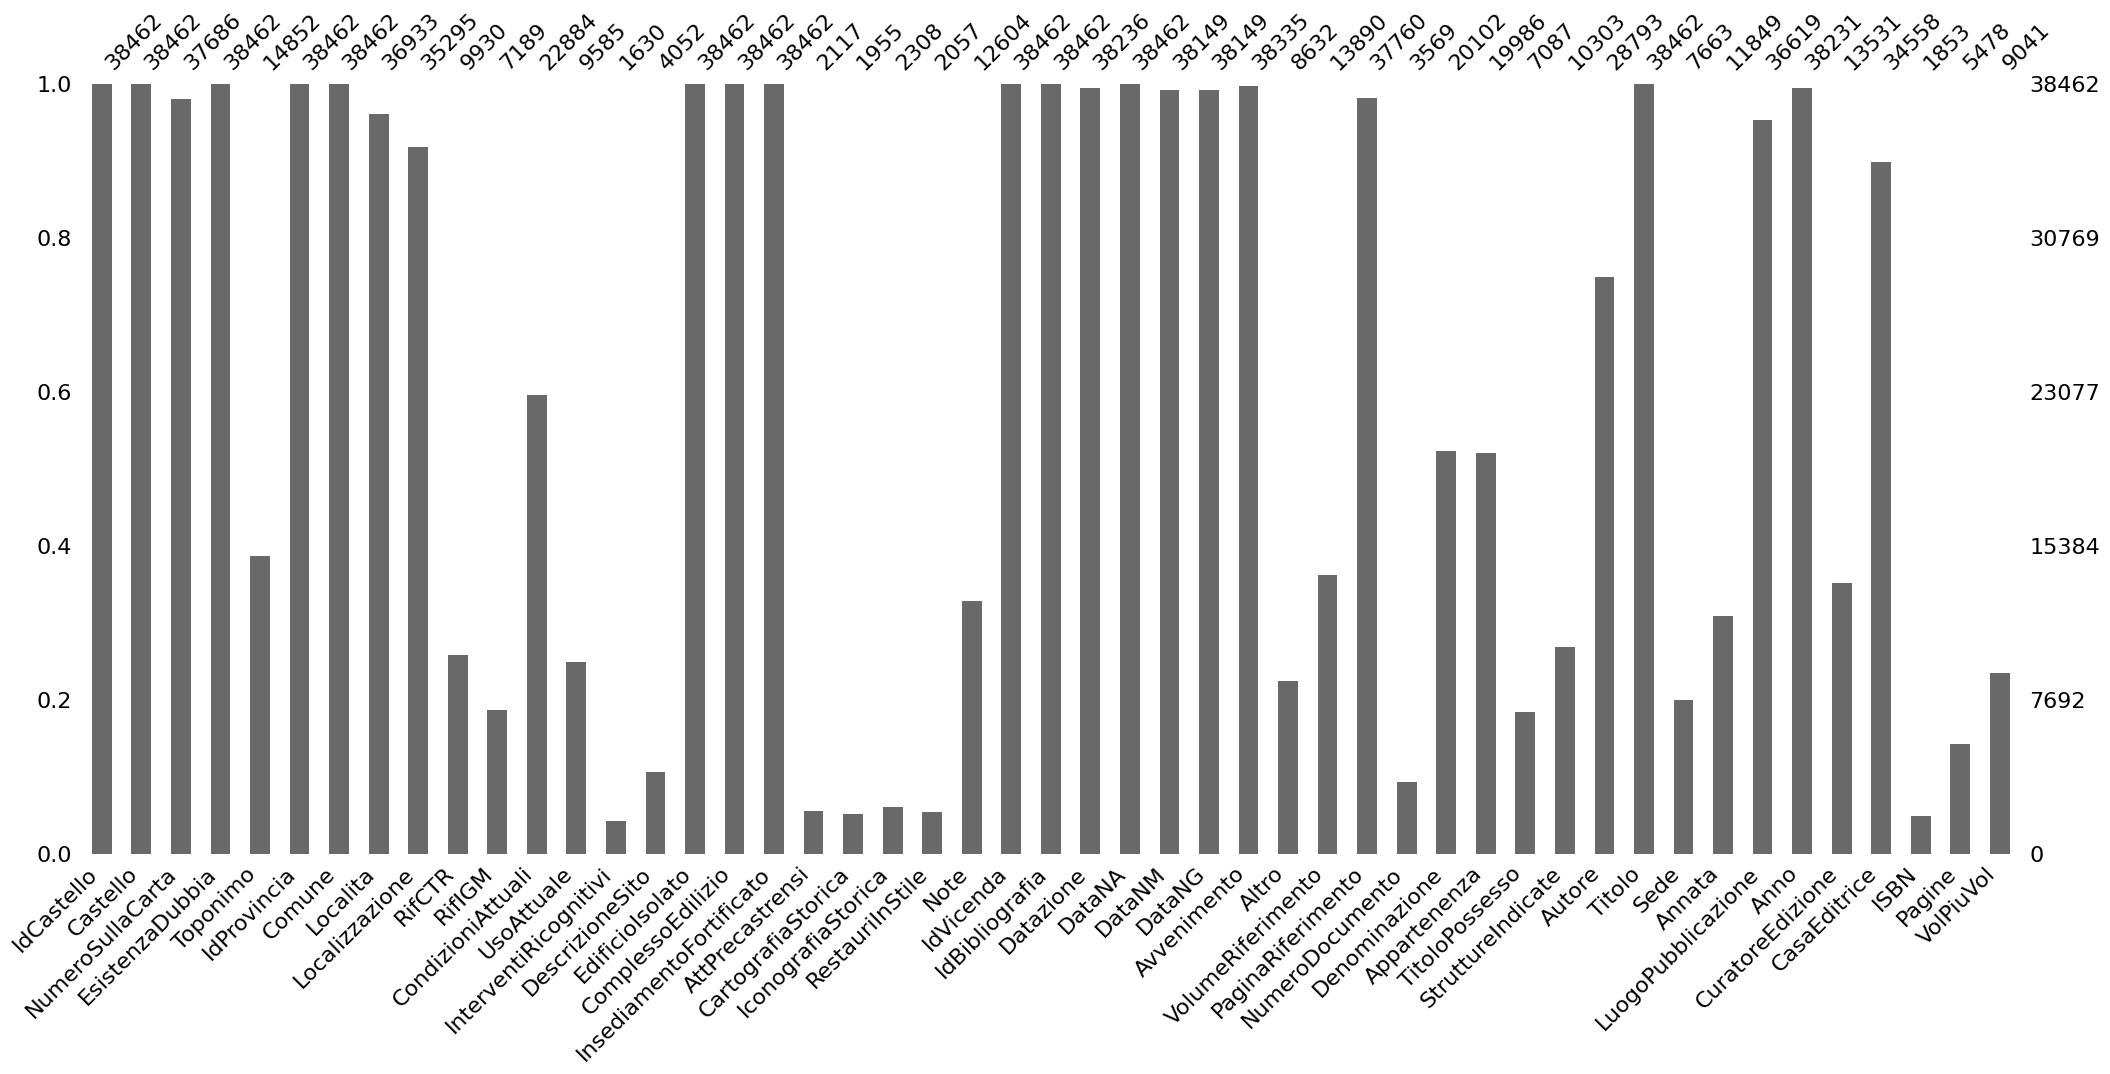

In [175]:
msno.bar(merged)